# 목표 : 미니배치기반 기계학습 진행 실습 
- 확률적경사하강법 기반의 알고리즘 적용 모델
- 기존 : 데이터의 처음부터 끝까지(epoch) 학습 후 가중치(W)와 절편(b) 업데이트 하는 방식
- 배울 것 : 에포크를 미니배치 크기만큼 나누어 학습 후 가중치(W)와 절편(b) 업데이트 진행 함
- 장점
  * 온라인 학습 즉, 점진적 학습 가능 => partial_fit() : 기존 모델에 추가로 1 epoch 학습
    fit은 이전 거 다 밀고 새로하는 거
  * 기존의 다른 모델보다 속도 빠름 => 랜덤으로 한 개 데이터 추출 후 학습 진행
- 단점
    * 전체 학습보다 정확도는 떨어질 수 있음

## 1. 모듈 로딩 및데이터 준비

In [1]:
import pandas as pd

data = '../data/fish.csv'

In [2]:
# 데이터 로딩
fishDF = pd.read_csv(data)
fishDF

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


## 데이터 전처리 => 학습을 위한 가공

### 2-1 피쳐 / 타겟 분리

In [3]:
featureDF = fishDF[fishDF.columns[1:]]
targetDF = fishDF["Species"]

print(f"feature => {featureDF.shape}")
print(f"target => {targetDF.shape}")

feature => (159, 5)
target => (159,)


### 2-2 학습 / 테스트용 데이터셋 분리

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF, stratify=targetDF, random_state=42)

In [5]:
print(f"[훈련용] => {X_train.shape}, {y_train.shape}")
print(f"[테스트용] => {X_test.shape}, {y_test.shape}")

[훈련용] => (119, 5), (119,)
[테스트용] => (40, 5), (40,)


### 2-3 피쳐 => 스케일링

In [6]:
from sklearn.preprocessing import StandardScaler

sdScaler = StandardScaler()
sdScaler.fit(X_train)

StandardScaler()

In [7]:
# 훈련용 데이터셋 스케일링
scaled_X_train = sdScaler.transform(X_train)

# 테스트용 데이터셋 스케일링
scaled_X_test = sdScaler.transform(X_test)

## 3. 학습 진행
- 학습 방법 : 확률적경사하강법(SGD) 기반의 분류

In [8]:
# 모델 인스턴스 생성 

from sklearn.linear_model import SGDClassifier

# 기본으로 다 하고 안나오면 하이퍼파라미터 조정해야함 
model_1 = SGDClassifier(random_state=41, verbose=1, loss = "log_loss", n_iter_no_change=1000, alpha=0.00001)
'''
penalty는 과대 적합 해결을 위함 default = l2

과대적합일 때, 강도 조절을 위함 
alpha가 높으면 가중치를 강하게 제한하여 단순한 결정 경계를 학습 -> 패턴에 민감하지 않게  반응
alpha 작아지면 규제가 약하게 들어가는 것 
alpha : float, default=0.0001
    Constant that multiplies the regularization term. 
'''
# 과정 보기 
# n_iter_no_change = 5 -> 5회동안 개선이 없으면 걍 멈추셈 

# -> 파라미터 조정이 넘 귀찮고 힘들다 -> grid
model_1.fit(scaled_X_train, y_train)

-- Epoch 1
Norm: 67.67, NNZs: 5, Bias: -45.294511, T: 119, Avg. loss: 2.616270
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 72.28, NNZs: 5, Bias: -63.200386, T: 238, Avg. loss: 0.175064
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 94.07, NNZs: 5, Bias: -64.194037, T: 357, Avg. loss: 0.329793
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 121.48, NNZs: 5, Bias: -64.126976, T: 476, Avg. loss: 0.639365
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 110.54, NNZs: 5, Bias: -79.789447, T: 595, Avg. loss: 0.042170
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 110.80, NNZs: 5, Bias: -78.637233, T: 714, Avg. loss: 0.126717
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 112.41, NNZs: 5, Bias: -76.061802, T: 833, Avg. loss: 0.072684
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 120.30, NNZs: 5, Bias: -61.292741, T: 952, Avg. loss: 0.027681
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 119.45, NNZs: 5, Bias: -62.079964, T: 1071, Avg. loss: 0.091925
To

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(alpha=1e-05, loss='log_loss', n_iter_no_change=1000,
              random_state=41, verbose=1)

In [9]:
train_score1 = model_1.score(scaled_X_train, y_train)
test_score1 = model_1.score(scaled_X_test, y_test)

In [10]:
print(f"[기본 SGD] 학습 점수 : {train_score1}, 테스트 점수 : {test_score1}")

[기본 SGD] 학습 점수 : 0.8907563025210085, 테스트 점수 : 0.925


In [11]:
# 학습 후 설정된 파라미터 -> 모델 파라미터
print(f"몇 회 반복함 ? : {model_1.n_iter_}")

몇 회 반복함 ? : 1000


<hr>1 epoch씩 점진적으로 학습 진행 => partial_fit()

In [12]:
# 모델 인스턴스 생성 
model_2 = SGDClassifier(loss = "log_loss")
model_2.partial_fit(scaled_X_train, y_train, y_train.unique()) # 매개변수가 조금 다름! 

SGDClassifier(loss='log_loss')

In [13]:
y_train.unique() # y train이 갖고 있는 고유값을 뽑으면 그게 class -> 뭔말이노

array(['Roach', 'Perch', 'Bream', 'Whitefish', 'Smelt', 'Parkki', 'Pike'],
      dtype=object)

In [14]:
train_score2 = model_2.score(scaled_X_train, y_train)
test_score2 = model_2.score(scaled_X_test, y_test)

In [15]:
print(f"[기본 SGD] 학습 점수 : {train_score2}, 테스트 점수 : {test_score2}") 
# iter를 쓰는 것이 아닌 반복문을 쓰면 됨

[기본 SGD] 학습 점수 : 0.8151260504201681, 테스트 점수 : 0.775


__partial_fit은 초기화가 안되기 때문에 run all 해야함!!__

In [16]:
train_score = []
test_score = []
for n in range(1, 100):
    model_2.partial_fit(scaled_X_train, y_train, y_train.unique())
    train_score2 = model_2.score(scaled_X_train, y_train)
    test_score2 = model_2.score(scaled_X_test, y_test)
    train_score.append(train_score2)
    test_score.append(test_score2)
    print(f"[{n}번 학습] [기본 SGD] 학습 점수 : {train_score2}, 테스트 점수 : {test_score2}")
    
    # 별 차이 안나는게 3번 정도 되면 멈추겠다, 아니면 0.90보다 크면 멈추겠다  -> 조건은 자기가 걸기 나름 
    if abs(test_score2 - train_score2) >=0.03:
        pass
        

[1번 학습] [기본 SGD] 학습 점수 : 0.7647058823529411, 테스트 점수 : 0.75
[2번 학습] [기본 SGD] 학습 점수 : 0.6974789915966386, 테스트 점수 : 0.7
[3번 학습] [기본 SGD] 학습 점수 : 0.8067226890756303, 테스트 점수 : 0.825
[4번 학습] [기본 SGD] 학습 점수 : 0.7563025210084033, 테스트 점수 : 0.75
[5번 학습] [기본 SGD] 학습 점수 : 0.7478991596638656, 테스트 점수 : 0.675
[6번 학습] [기본 SGD] 학습 점수 : 0.7058823529411765, 테스트 점수 : 0.675
[7번 학습] [기본 SGD] 학습 점수 : 0.6470588235294118, 테스트 점수 : 0.575
[8번 학습] [기본 SGD] 학습 점수 : 0.8487394957983193, 테스트 점수 : 0.775
[9번 학습] [기본 SGD] 학습 점수 : 0.8403361344537815, 테스트 점수 : 0.875
[10번 학습] [기본 SGD] 학습 점수 : 0.865546218487395, 테스트 점수 : 0.9
[11번 학습] [기본 SGD] 학습 점수 : 0.8403361344537815, 테스트 점수 : 0.9
[12번 학습] [기본 SGD] 학습 점수 : 0.7310924369747899, 테스트 점수 : 0.65
[13번 학습] [기본 SGD] 학습 점수 : 0.7226890756302521, 테스트 점수 : 0.6
[14번 학습] [기본 SGD] 학습 점수 : 0.7563025210084033, 테스트 점수 : 0.6
[15번 학습] [기본 SGD] 학습 점수 : 0.8823529411764706, 테스트 점수 : 0.925
[16번 학습] [기본 SGD] 학습 점수 : 0.865546218487395, 테스트 점수 : 0.925
[17번 학습] [기본 SGD] 학습 점수 : 0.8739495798319328, 테스

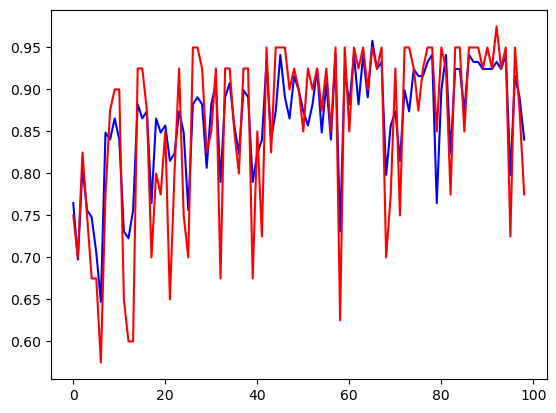

In [17]:
# 시각화 
import matplotlib.pyplot as plt
plt.plot(train_score, "b-", label = "Train")
plt.plot(test_score,"r-", label = "Test")